In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

## Argumentation Network

In [11]:
Graph = nx.nx_agraph.read_dot('./Dataset/devonshiredebate_withclusters.dot/devonshiredebate_withclusters.dot')
edge_list =[]
for e in Graph.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in Graph.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

1015
335


### I imported fruchterman_reingold function from step3 

In [22]:
import import_ipynb
from step3 import fruchterman_reingold

## Defining two subgraphs as mentioned in step 5 description 

In [24]:
cluster1_nodes = [
    "n64", "n66", "n106", "n137", "n138", "n139", "n140", "n141", "n142", 
    "n143", "n144", "n145", "n146", "n147", "n148", "n149", "n249", "n250", 
    "n251", "n252", "n253", "n254", "n255", "n256", "n257", "n258", "n259", 
    "n260", "n261", "n262", "n263", "n264", "n265", "n266", "n267", "n268", 
    "n269", "n270", "n271", "n272", "n273", "n274", "n275", "n276", "n277", 
    "n278", "n279", "n280", "n281", "n282", "n283", "n284", "n285", "n286", 
    "n287", "n288", "n289", "n290", "n291", "n292", "n293", "n294", "n295", "n296"
] # Youngest Devonian Strata
cluster2_nodes = [
    "n150", "n151", "n152", "n153", "n154", "n297", "n298", "n299", "n300",
    "n301", "n302", "n303", "n304", "n305", "n306", "n307", "n308", "n309",
    "n310", "n311", "n312", "n313", "n314", "n315", "n316", "n317", "n318",
    "n319", "n320", "n321", "n322", "n323", "n324", "n325", "n326", "n327",
    "n328", "n329", "n330", "n331", "n332", "n333", "n334"
]#Gap in the Sequence of Devonshi

subgraph1 = Graph.subgraph(cluster1_nodes) 
subgraph2 = Graph.subgraph(cluster2_nodes)


pos1 = fruchterman_reingold(subgraph1, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)
pos2 = fruchterman_reingold(subgraph2, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)

# Calculate the bounding boxes for each layout
bbox1 = (min([pos[0] for pos in pos1.values()]), min([pos[1] for pos in pos1.values()]),
         max([pos[0] for pos in pos1.values()]), max([pos[1] for pos in pos1.values()]))
bbox2 = (min([pos[0] for pos in pos2.values()]), min([pos[1] for pos in pos2.values()]),
         max([pos[0] for pos in pos2.values()]), max([pos[1] for pos in pos2.values()]))


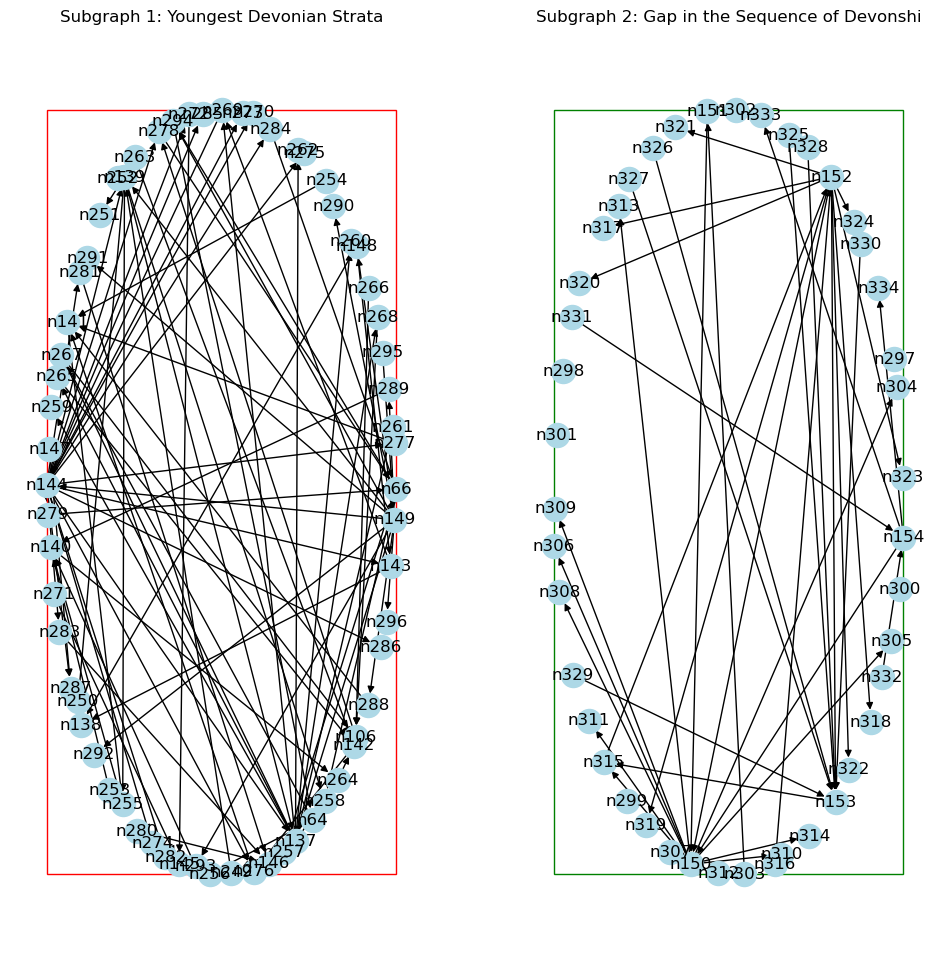

In [25]:
plt.figure(figsize=(12, 12))

plt.subplot(121)
nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue')

rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1],
                          linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect1)
plt.title('Subgraph 1: Youngest Devonian Strata')


plt.subplot(122)
nx.draw(subgraph2, pos2, with_labels=True, node_size=300, node_color='lightblue')

rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1],
                          linewidth=1, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect2)
plt.title('Subgraph 2: Gap in the Sequence of Devonshi')

plt.show()
